
#**<font color='magenta'>Laplace Approximation</font>**
***
**Students**


|         Full name         |   Username  |         Email         |
|---------------------------|-------------|-----------------------|
| Emmanuel Nyandu Kagarabi  | emmanuelnk  | emannuelnk@aims.ac.za |
| Clément ADANDé            | clementa    | clementa@aims.ac.za   |
| Hermann Michael TITCHO    | michaelt    | michaelt@aims.ac.za   |

<font color='purple'>`Welcome to this notebook related to the Laplace Approximation.`</font>

# **Goals**
1. *Laplace approximation in 1D*
2. *Show an example of obtaining an estimate based on the likelihood in 1D*
3. *Show an example of obtaining an estimate based on the posteriors in 1D*
4. *Explain Laplace approximation in N D, explain  Hessian/Fisher information matrix*
5. *Implement Laplace Approximation*



# **1. Introduction**

In statistics, it is common to estimate parameters from data and model uncertainty about these parameters using a probability distribution. This process is known as **inference**. In the field of **Bayesian statistics**, the approach of using the posterior distribution to represent this uncertainty is adopted. To compute the **posterior**, we begin with a **prior** distribution $p(θ) $ that reflects our knowledge before observing the data. We then define a **likelihood** function $p(\mathcal{D}|θ)$ that represents the expected data for each parameter setting. By applying Bayes' rule, we condition the prior on the observed data to compute the posterior $p(θ|\mathcal{D})$ as follows:

$$\boxed{p(θ|\mathcal{D})=\dfrac{p(\mathcal{D}|θ)p(θ)}{p(\mathcal{D})}=\dfrac{p(\mathcal{D}|θ)p(θ)}{∫ p(\mathcal{D}|θ)p(θ)dθ}}$$

The denominator $p(\mathcal{D})$ is called the **marginal likelihood** since it is computed by integrating out the unknown $θ$.

However, actually performing the computation of $p(θ|\mathcal{D})$ is usually **intractable**, except for simple special cases. Therefore, we need to approximate the posterior. There are various methods available for performing approximate posterior inference, such as **Grid Approximation**, **Laplace Approximation**, **Variational Approximation**, **Markov Chain Monte Carlo (MCMC) Approximatio**n, etc. In this project, we will focus solely on **Laplace Approximation**.

# **2. Development**

**2.1. Laplace approximation in 1d**



It aims to find a Gaussian approximation to a probability density defined over a set of continuous variables.
So let's consideer the case of a single continuous variable $z$, and suppose the distribution $p(z)$ is defined by $$p(z)=\dfrac{1}{Z}f(z)$$ where
$$Z= ∫ f(z)dz$$ is the **normalisation coefficient**. Let's assume $Z$ is **unkown.** In the **Laplace method** the goal is to find a Gaussian approximation $q(z)$ which is centered on a mode of the distribution $p(z)$.

The first step is to find a mode of $p(z)$, in words, a point $z_0$ such that
$$p'(z)=0\text{ or } \dfrac{df(z)}{dz}\bigg\lvert_{z=z_0}=0$$

A Gaussian distribution has the property that its logarithm is a quadratic function of the variables. Let's consider now the Taylor expansion of $\ln f(z)$ centered on the mode $z_{0}$.
\begin{align}
\ln f(z)≈\ln f(z_0)+\frac{d}{dz}\left[\ln f(z)\right]\bigg\lvert_{z=z_0}(z-z_{0})+\frac{1}{2!}\frac{d^2}{dz^2}[\ln f(z)]\bigg\lvert_{z=z_0}(z-z_0)^{2}\\
\end{align}
where $$ \frac{d}{dz}\left[\ln f(z)\right]\bigg\lvert_{z=z_0}=[\ln[f(z_0)]' =\ln'[f(z_0)]⋅f'(z_0)=0 \text{ ( because $z_0$ is a maximizer of f.)}$$ Then,
\begin{align}
& \ln f(z)\approx \ln[f(z_0)]+0-\frac{1}{2}\left[-\frac{d^2}{dz^2}[\ln f(z)]\bigg\lvert_{z=z_0}(z-z_0)^{2}\right]\\
⇒&\ln f(z)≈ \ln[f(z_0)]-\frac{1}{2}A(z-z_0)^{2}\text{ where } A= -\frac{d^2}{dz^2}[\ln f(z)]\bigg\lvert_{z=z_0}\\
⇒&\exp\{\ln f(z)\}≈\exp\left\{\ln[f(z_0)]-\frac{1}{2}A(z-z_0)^{2}\right\}\\
  ⇒&f(z)≈\exp\{\ln[f(z_0)]\}\cdot\exp\left\{-\frac{1}{2}A(z-z_0)^{2}\right\} \\
⇒&f(z)≈f(z_0)\exp\left\{-\frac{1}{2}A(z-z_0)^{2}\right\}\\
\end{align}
 We obtain a normalized distribution $q(z)$ by making use of the standard result for the normalization of a gaussian. In fact,

 \begin{align}
 Z&=\int f(z) dz\\
 &=∫f(z_0)\exp\left\{-\frac{1}{2}A(z-z_0)^{2}\right\}dz\\
 &=f(z_0)∫\exp\left\{-\frac{1}{2}A(z-z_0)^{2}\right\}dz\\
 &=f(z_0)∫\exp\left\{-\frac{1}{2}(A^{-1})^{-1}(z-z_0)^{2}\right\}dz\\
 &=f(z_0)∫\exp\left\{-\frac{1}{2}\dfrac{(z-z_0)^{2}}{A^{-1}}\right\}dz\\
 &= f(z_0)\sqrt{2π A^{-1}}\\
 \end{align}
 Then,

 \begin{align}
 q(z)\approx p(z)&=\frac{1}{Z}f(z)\\
 &=\dfrac{1}{f(z_0)\sqrt{2π A^{-1}}}⋅f(z_0)\exp\left\{-\frac{1}{2}A(z-z_0)^{2}\right\}\\
  &=\left(\dfrac{A}{\sqrt{2π}}\right)^{1/2}⋅\exp\left\{-\frac{1}{2}\dfrac{(z-z_0)^{2}}{A^{-1}}\right\}\\
 &=\dfrac{1}{\sqrt{2π A^{-1}}}⋅\exp\left\{-\frac{1}{2}\dfrac{(z-z_0)^{2}}{A^{-1}}\right\}\\
 &=\mathcal{N}\left(z|z_0,A^{-1}\right)
 \end{align}

 Therefore, $q(z)$ is a normal distribution of mean $z_0$ and variance $A^{-1}>0$.

**2.2. Laplace approximation in $N$-dimensional space**

Let's consider the same assumptions over $p(z)$, $f(z)$, $Z_0$  and $q(z)$ as before however, we are now in N-dimensional space. In fact, at the stationary point $z_0$, the gradient $∇ f(x)$ will vanish. That's to say

\begin{align}
\nabla_{f}(z_0) = 0.
\end{align}
By using Taylor expansion of $\ln f(z)$ at $z = z_0$, we have:
\begin{align}
\ln f(z)≈ \ln f(z_0)+\nabla \ln f(z_0)(z-z_0)+\frac{1}{2!}(z-z_0)^{T}\nabla^{2}\ln f(z_0)(z-z_0).
\end{align} Then,
\begin{align}
&\ln f(z)≈ \ln f(z_0)+\frac{1}{2}(z-z_0)^{T}\nabla^{2}\ln f(z_0)(z-z_0)\\
⇒&\ln f(z) \approx \ln f(z_0)-\left[-\frac{1}{2}(z-z_0)^{T}\nabla^{2}\ln f(z_0)(z-z_0)\right]
\end{align}
Let's say,
\begin{align}
A = -\nabla^{2}\ln f(z_0)
\end{align}

\begin{align}
⇒&\ln f(z)\approx\ln f(z_0)-\frac{1}{2}(z-z_0)^{T}A(z-z_0)\\
⇒&\exp\{\ln f(z)\}\approx\exp\left\{\ln f(z_0)-\frac{1}{2}(z-z_0)^{T}A(z-z_0)\right\}\\
⇒&f(z)\approx f(z_0)\exp\left\{-\frac{1}{2}(z-z_0)^{T}A(z-z_0)\right\}
\end{align}
As before, we obtain a normal distribution $q(z)$ by making use of the standard result for a normalized multivariate Gaussian:
\begin{align}
Z&=\int f(z) dz\\
&=\int f(z_0)\exp\left\{-\frac{1}{2}(z-z_0)^{T}A(z-z_0)\right\}dz\\
&=f(z_0)\int \exp\left\{-\frac{1}{2}(z-z_0)^{T}A(z-z_0)\right\}dz\\
&=f(z_0)\int \exp\left\{-\frac{1}{2}(z-z_0)^{T}\left(A^{-1}\right)^{-1}(z-z_0)\right\}dz\\
&=f(z_0)\sqrt{|2π A^{-1}|}\\
&=f(z_0)\sqrt{(2π)^{N} |A^{-1}|}\\
Z&=f(z_0)\left(\frac{(2π)^{N}}{|A|}\right)^\frac{1}{2}
\end{align}
Then,

\begin{align}
q(z)\approx p(z)&=\dfrac{1}{Z}f(z)\\
&=\frac{1}{f(z_0)\sqrt{(2π)^{N} |A^{-1}|}}f(z_0)\exp\left\{-\frac{1}{2}(z-z_0)^{T}A(z-z_0)\right\}\\
&=\left(\frac{A}{(2π)^{N}}\right)^\frac{1}{2}\exp\left\{-\frac{1}{2}(z-z_0)^{T}\left(A^{-1}\right)^{-1}(z-z_0)\right\}\\
&=\frac{1}{\sqrt{(2π)^{N} |A^{-1}|}}\exp\left\{-\frac{1}{2}(z-z_0)^{T}\left(A^{-1}\right)^{-1}(z-z_0)\right\}\\
q(z)\approx p(z)&=\mathcal{N}\left(z|z_0,A^{-1}\right)
\end{align}

Where $|A|$ denotes the determinant of $A$. This gaussian distribution will be well defined provided its precision matrix, given by $A$, is positive definite.

**2.3. Fisher information matrix**

The Fisher information is a way of measuring the amount of information that an observable random variable $X$ carries about an unknown parameter $\theta$ upon which the probability of $X$ depends. Let $f(X;\theta)$ be the probability density function (or probability mass function) for $X$ conditioned on the value of $\theta$. It describes the probability that we observe a given outcome of $X$, given a known value of $\theta$. If $f$ is sharply peaked with respect to changes in $\theta$, it is easy to indicate the "correct" value of $\theta$ from the data, or equivalently, that the data $X$ provides a lot of information about the parameter $\theta$. If $f$ is flat and spread-out, then it would take many samples of $X$ to estimate the actual "true" value of $\theta$ that would be obtained using the entire population being sampled. This suggests studying some kind of variance with respect to $\theta$.

Formally, the partial derivative with respect to $\theta$ of the natural logarithm of the likelihood function is called the score. Under certain regularity conditions, if $\theta$ is the true parameter (i.e., $X$ is actually distributed as $f(X;\theta)$), it can be shown that the expected value (the first moment) of the score, evaluated at the true parameter value $\theta$, is $0$:
\begin{align}
\operatorname{E}\left[\left.\frac{\partial}{\partial\theta}\log f(X;\theta)\,\,\right|\,\,\theta\right]& = \int_{\mathbb{R}}\frac{\frac{\partial}{\partial\theta}f(x;\theta)}{f(x;\theta)}f(x;\theta)\,dx\\
&= \frac{\partial}{\partial\theta}\int_{\mathbb{R}}f(x;\theta)\,dx\\
&= \frac{\partial}{\partial\theta}1\\
&= 0.
\end{align}

The Fisher information is defined to be the variance of the score:

\begin{equation}
\mathcal{I}(\theta) = \operatorname{E}\left[\left.\left(\frac{\partial}{\partial\theta}\log f(X;\theta)\right)^{2}\,\,\right|\,\,\theta\right] = \int_{\mathbb{R}}\left(\frac{\partial}{\partial\theta}\log f(x;\theta)\right)^{2}f(x;\theta)\,dx,
\end{equation}

Note that $\mathcal{I}(\theta) \geq 0$. A random variable carrying high Fisher information implies that the absolute value of the score is often high. The Fisher information is not a function of a particular observation, as the random variable $X$ has been averaged out.

If $\log f(x;\theta)$ is twice differentiable with respect to $\theta$, and under certain regularity conditions, then the Fisher information may also be written as
\begin{equation}
\mathcal{I}(\theta) = -\operatorname{E}\left[\left.\frac{\partial^2}{\partial\theta^2}\log f(X;\theta)\,\,\right|\,\,\theta\right],
\end{equation}
since
\begin{equation}
\frac{\partial^2}{\partial\theta^2}\log f(X;\theta) = \frac{\frac{\partial^2}{\partial\theta^2}f(X;\theta)}{f(X;\theta)} - \left(\frac{\frac{\partial}{\partial\theta}f(X;\theta)}{f(X;\theta)}\right)^{2} = \frac{\frac{\partial^2}{\partial\theta^2}f(X;\theta)}{f(X;\theta)} - \left(\frac{\partial}{\partial\theta}\log f(X;\theta)\right)^{2}
\end{equation}
and
\begin{equation}
\operatorname{E}\left[\left.\frac{\partial^2}{\partial\theta^2}\frac{f(X;\theta)}{f(X;\theta)}\,\,\right|\,\,\theta\right] = \frac{\partial^2}{\partial\theta^2}\int_{\mathbb{R}}f(x;\theta)\,dx = 0.
\end{equation}

Thus, the Fisher information may be seen as the curvature of the support curve (the graph of the log-likelihood). Near the maximum likelihood estimate, low Fisher information therefore indicates that the maximum appears "blunt", that is, the maximum is shallow and there are many nearby values with a similar log-likelihood. Conversely, high Fisher information indicates that the maximum is sharp.


**2.4. Implementation of a 1d example**

In [ ]:
#@title Import
import jax
import jax.numpy as jnp
from scipy.optimize import minimize_scalar
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [ ]:
#sigmoid function
def sigmoid(x):
    return 1 / (1 + jnp.exp(-x))

#Unnormalized distribution
def f(x):
  return jnp.exp(-0.5*x**2)*sigmoid(20*x+2)

#Gaussian density
def gaussian(x, mean, std):
  return jnp.exp(-0.5*(x-mean)**2/std)/jnp.sqrt(2*jnp.pi*std)

In [ ]:
#@title 1. Compute the mode

#Maximum of f
max_sol = minimize_scalar(lambda x: -f(x), method='bounded', bounds=(-4,4))

mode = max_sol.x

print("Optimal solution of maximum of f :", mode)

Optimal solution of maximum of f : 0.14572664


In [ ]:
#@title 2. Evalute negative second derivative of f at the mode
neg_log_f = lambda x: -jnp.log(f(x))

A = jax.hessian(neg_log_f)(mode)
print("Negative hessian at the mode : ", A)
print("Std of Laplace approximation : ", 1/A)

Negative hessian at the mode :  3.893038
Std of Laplace approximation :  0.2568688


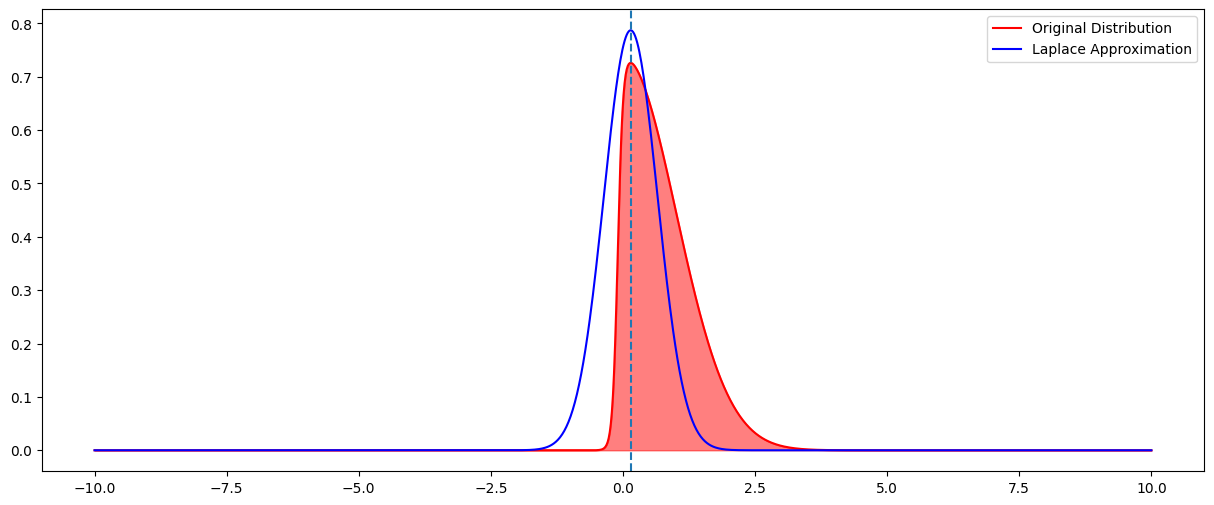

In [ ]:
#@title 3.  Plotting

#################
x = jnp.linspace(-10,10,1000)
#Normalization
Z, _ = quad(f, -jnp.inf, jnp.inf)
original_dist = f(x)/Z

#Laplace approximation
pred_dist = gaussian(x, mode, 1/A)
#################
plt.figure(figsize=(15, 6))
plt.plot(x, original_dist, color="red", label="Original Distribution")
plt.fill_between(x, original_dist, color='red', alpha=0.5)
plt.plot(x, pred_dist, color="blue", label="Laplace Approximation")
plt.axvline(x=mode, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Z_orig = ",Z)
print("Z_gau = ",jnp.sqrt(2*jnp.pi/A) )

Z_orig =  1.3527420227798648
Z_gau =  1.2704151


# **3. Conclusion**

The Laplace approximation framework:

- Simple but widely used framework,

- 	Aims to find a Gaussian approximation to a
probability density defined over a set of
continuous variables, defined for both univariate and multivariate, directly applicable only to real variables.

- Method aims specifically at problems in which
the distribution is unimodal, We can find the mode using a standard optimization method,

- Many distributions encountered in practice are
multimodal:There will be different approximations according to
which mode considered,


# **4. References**

- **Christopher M Bishop**. [Pattern recognition and machine learning](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/). Springer, 2006.

- **Kevin P Murphy**. [Probabilistic machine learning : An introduction](https://mitpress.mit.edu/9780262046824/probabilistic-machine-learning/). MIT press, 2022.

- **Kevin P Murphy**.[Probabilistic machine learning : Advanced topics](https://mitpress.mit.edu/9780262048439/probabilistic-machine-learning/).
MIT press, 2023.